In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [189]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [190]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [191]:
rr_csk=matches[((matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals')) & ((matches.team1=='Chennai Super Kings') | (matches.team2=='Chennai Super Kings'))]
rr=matches[(matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals')]
csk=matches[(matches.team1=='Chennai Super Kings') | (matches.team2=='Chennai Super Kings')]
rr_csk.shape,rr.shape,csk.shape

((21, 18), (147, 18), (164, 18))

In [192]:
rr_cskdeli=deliveries[((deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals')) & ((deliveries.batting_team=='Chennai Super Kings') | (deliveries.bowling_team=='Chennai Super Kings'))]
rrdeli=deliveries[(deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals')]
cskdeli=deliveries[(deliveries.batting_team=='Chennai Super Kings') | (deliveries.bowling_team=='Chennai Super Kings')]
rr_cskdeli.shape,rrdeli.shape,cskdeli.shape

((5095, 21), (34674, 21), (39318, 21))

In [193]:
rr_csk.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
109,110,2008,Chennai,2008-05-24,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri,NaN
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
136,137,2009,Centurion,2009-04-30,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,38,0,SK Raina,SuperSport Park,GAV Baxter,RE Koertzen,NaN
151,152,2009,Kimberley,2009-05-09,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,7,S Badrinath,De Beers Diamond Oval,GAV Baxter,HDPK Dharmasena,NaN


In [194]:
rr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
64,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
67,68,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
69,70,2008,Bangalore,2008-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN
77,78,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN


In [195]:
csk.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN


In [196]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='m',alpha=0.5)
        ax[i].set_title(columns[i])

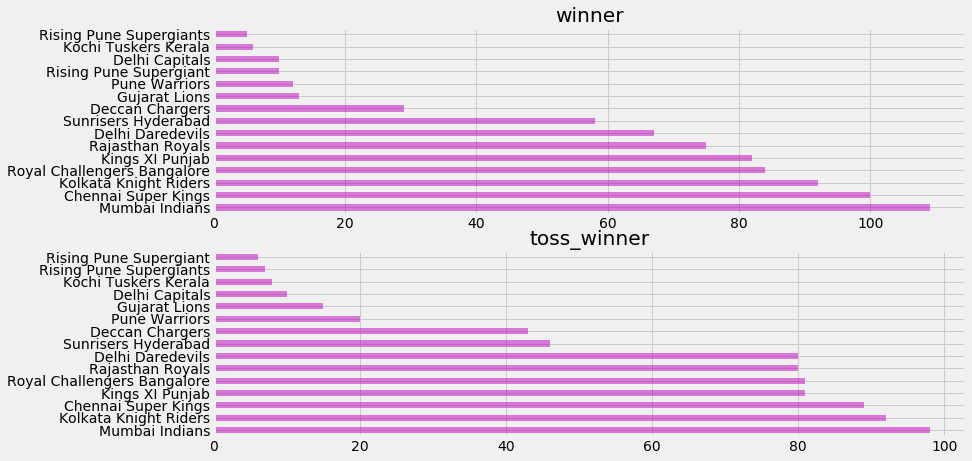

In [197]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')

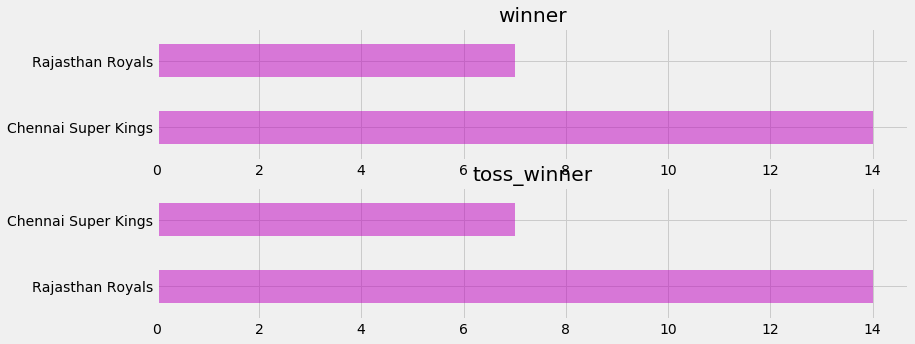

In [198]:
cat_plot(rr_csk,['winner','toss_winner'],(12,5),'barh')

### Chennai super kings are more likely to win the match

# Q2

In [199]:
rrsuperover=rrdeli.query('over<=6 & batting_team==\'Rajasthan Royals\'').groupby('match_id').sum().total_runs

rrsuperover.describe()

count    146.000000
mean      45.239726
std       11.863188
min       14.000000
25%       36.250000
50%       45.000000
75%       53.000000
max       81.000000
Name: total_runs, dtype: float64

In [200]:
rrsuperovercsk=rr_cskdeli.query('over<=6 & batting_team==\'Rajasthan Royals\'').groupby('match_id').sum().total_runs
rrsuperovercsk.describe()

count    21.000000
mean     45.571429
std      11.258647
min      24.000000
25%      38.000000
50%      44.000000
75%      55.000000
max      67.000000
Name: total_runs, dtype: float64

Text(0.5, 1.0, 'RR against CSK')

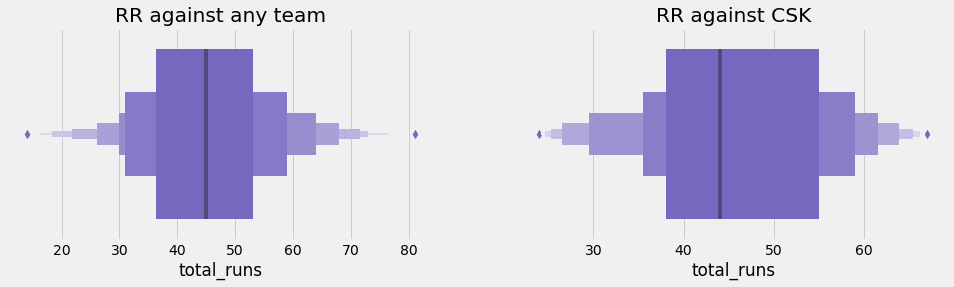

In [201]:
fig=plt.figure(figsize=(15,8))
fig.add_subplot(221)
sns.boxenplot(rrsuperover,color='slateblue')
plt.title('RR against any team')

fig.add_subplot(222)
sns.boxenplot(rrsuperovercsk,color='slateblue')
plt.title('RR against CSK')

### As it is evident by the above analysis RR is likely to score between 40-50 in the first 6 overs.

# Q3

In [224]:
chahar_eco=deliveries[(deliveries.bowler.str.contains('DL Chahar')) ]
chahar_ecorrcsk=rr_cskdeli[(rr_cskdeli.bowler.str.contains('DL Chahar')) ]
chahar_ecocsk=cskdeli[(cskdeli.bowler.str.contains('DL Chahar'))]


In [225]:
chahar_eco.over.unique(),chahar_ecorr.over.unique(),chahar_ecorrcsk.over.unique()

(array([ 2,  6,  4,  1,  3,  5, 12,  7,  8, 11, 10, 19,  9], dtype=int64),
 array([19], dtype=int64),
 array([ 1,  3,  5,  7, 19], dtype=int64))

In [226]:
chahar_eco.bowling_team.unique()

array(['Rising Pune Supergiant', 'Rising Pune Supergiants',
       'Chennai Super Kings'], dtype=object)

In [227]:
chahar_ecorrcsk.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
154358,7910,2,Rajasthan Royals,Chennai Super Kings,1,1,AM Rahane,H Klaasen,DL Chahar,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
154359,7910,2,Rajasthan Royals,Chennai Super Kings,1,2,AM Rahane,H Klaasen,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
154360,7910,2,Rajasthan Royals,Chennai Super Kings,1,3,H Klaasen,AM Rahane,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
154361,7910,2,Rajasthan Royals,Chennai Super Kings,1,4,H Klaasen,AM Rahane,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
154362,7910,2,Rajasthan Royals,Chennai Super Kings,1,5,AM Rahane,H Klaasen,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [228]:
chahar_ecocsk=chahar_ecocsk.head()

In [229]:
(chahar_ecocsk.total_runs-(chahar_ecocsk.bye_runs+chahar_ecocsk.legbye_runs)).describe()

count    5.000000
mean     1.000000
std      1.732051
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      4.000000
dtype: float64

In [230]:
(chahar_ecorrcsk.total_runs-(chahar_ecorrcsk.bye_runs+chahar_ecorrcsk.legbye_runs)).describe()

count    77.000000
mean      1.142857
std       1.448359
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       6.000000
dtype: float64

In [231]:
(chahar_eco.total_runs-(chahar_eco.bye_runs+chahar_eco.legbye_runs)).describe()

count    728.000000
mean       1.255495
std        1.637120
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
dtype: float64

### Chahar will have a economy rate of 0-6

# Q 4

In [232]:
deliveries[deliveries.batsman.str.contains('Archer')].batsman.head(1)

155381    J Archer
Name: batsman, dtype: object

In [250]:
jofra=deliveries[(deliveries.bowler.str.contains('J Archer')) & ((deliveries.over>=15) & (deliveries.over<=20))]
jofra_rrcsk=rr_cskdeli[(rr_cskdeli.bowler.str.contains('J Archer')) & ((rr_cskdeli.over>=15) & (rr_cskdeli.over<=20)) ]
jofrarr=rrdeli[(rrdeli.bowler.str.contains('J Archer')) & ((rrdeli.over>=15) & (rrdeli.over<=20))]


In [251]:
jofra.dismissal_kind.value_counts(),jofra_rrcsk.dismissal_kind.value_counts(),jofracsk.dismissal_kind.value_counts()

(caught    9
 bowled    4
 lbw       2
 Name: dismissal_kind, dtype: int64,
 caught    1
 Name: dismissal_kind, dtype: int64,
 caught    9
 bowled    4
 lbw       2
 Name: dismissal_kind, dtype: int64)

In [252]:
jofra.groupby('match_id').count().dismissal_kind.describe()

count    20.000000
mean      0.750000
std       1.019546
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000
Name: dismissal_kind, dtype: float64

In [318]:
jofrarr.groupby('match_id').count().dismissal_kind.describe()

count    20.000000
mean      0.750000
std       1.019546
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000
Name: dismissal_kind, dtype: float64

In [254]:
jofra_rrcsk.groupby('match_id').count().dismissal_kind.describe()

count    3.000000
mean     0.333333
std      0.577350
min      0.000000
25%      0.000000
50%      0.000000
75%      0.500000
max      1.000000
Name: dismissal_kind, dtype: float64

### Jofra Archer is likely to take 0-1 wicket in the death over

# Q5

In [306]:
steve_strike=deliveries[deliveries.batsman.str.contains('SPD Smith')].pivot_table(index='match_id',aggfunc=['count','sum'],values=['ball','batsman_runs'])
steve_strike.head()

count               sum             
          ball batsman_runs ball batsman_runs
match_id                                     
2           55           55  207           84
4           28           28  106           26
13          30           30  121           43
17          26           26   87           27
25          21           21   71           27

In [307]:
steve_strike=(steve_strike['sum','batsman_runs']/steve_strike['count','ball']*100)
steve_strike.describe()

count     72.000000
mean     124.470364
std       46.344566
min       33.333333
25%       93.668831
50%      116.233766
75%      147.222222
max      243.750000
dtype: float64

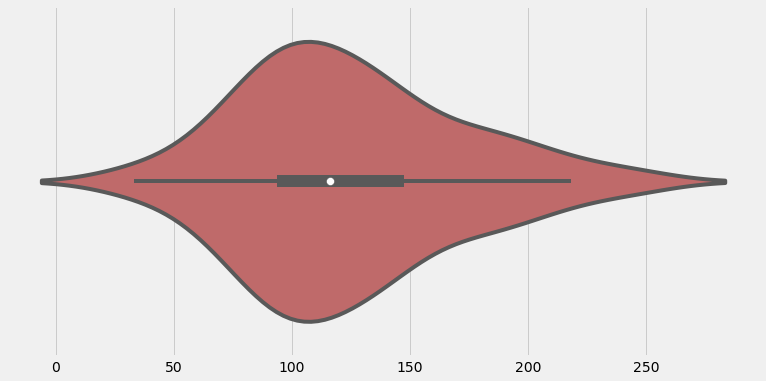

In [317]:
plt.figure(figsize=(12,6))
sns.violinplot(steve_strike,color='indianred')

### We can conclude that steve smith's strike rate will be between 100-140